In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [83]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/BRITANNIA.csv")

In [84]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11,NaN,NaN,NaN
1,2000-01-04,BRITANNIA,EQ,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11,NaN,NaN,NaN
2,2000-01-05,BRITANNIA,EQ,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11,NaN,NaN,NaN
3,2000-01-06,BRITANNIA,EQ,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12,NaN,NaN,NaN
4,2000-01-07,BRITANNIA,EQ,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12,NaN,NaN,NaN


In [85]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5305 non-null   object 
 1   Symbol              5305 non-null   object 
 2   Series              5305 non-null   object 
 3   Prev Close          5305 non-null   float64
 4   Open                5305 non-null   float64
 5   High                5305 non-null   float64
 6   Low                 5305 non-null   float64
 7   Last                5305 non-null   float64
 8   Close               5305 non-null   float64
 9   VWAP                5305 non-null   float64
 10  Volume              5305 non-null   int64  
 11  Turnover            5305 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4796 non-null   float64
 14  %Deliverble         4796 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.8

In [86]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5.305000e+03,5.305000e+03,2456.000000,4.796000e+03,4796.000000
mean,1687.974769,1690.173054,1713.527135,1665.679293,1688.601112,1688.492347,1689.630878,1.220883e+05,3.531071e+13,19243.627850,6.877725e+04,0.644524
std,1364.834888,1367.095820,1379.848544,1350.727532,1365.080043,1364.982005,1365.360931,2.668956e+05,9.119291e+13,22420.581857,1.340685e+05,0.179159
min,336.350000,340.000000,347.700000,295.200000,336.950000,336.350000,339.860000,8.400000e+01,9.614630e+09,27.000000,5.700000e+01,0.027900
25%,591.800000,594.500000,603.900000,580.200000,592.500000,591.800000,592.100000,4.284000e+03,3.694440e+11,4496.750000,3.040500e+03,0.518900
50%,1230.150000,1230.000000,1259.000000,1203.350000,1230.000000,1230.300000,1232.610000,2.002900e+04,1.347110e+12,13231.000000,1.913050e+04,0.651350
75%,2743.700000,2741.050000,2778.400000,2701.100000,2747.000000,2743.900000,2743.300000,1.347500e+05,3.634675e+13,24920.750000,8.919100e+04,0.777425
max,6900.150000,6918.000000,6934.350000,6831.700000,6898.000000,6900.150000,6886.460000,5.383773e+06,1.954734e+15,294264.000000,4.253015e+06,1.000000


In [87]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [88]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [89]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [90]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [91]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [92]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [93]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5300,3.709997,-3.329600,3539.20,1031406,NaN
5301,1.637759,-0.881686,3541.20,813608,NaN
5302,1.671952,-0.265195,3478.75,1498181,NaN
5303,1.708732,-0.796454,3468.90,611087,NaN
5304,0.912133,-0.317919,3449.00,436187,NaN


In [94]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [95]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [96]:
#Define the prediction model
model = RandomForestRegressor()

In [97]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [98]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9730106175480284


In [99]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [100]:
predictions = model.predict(X_Check)

In [101]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

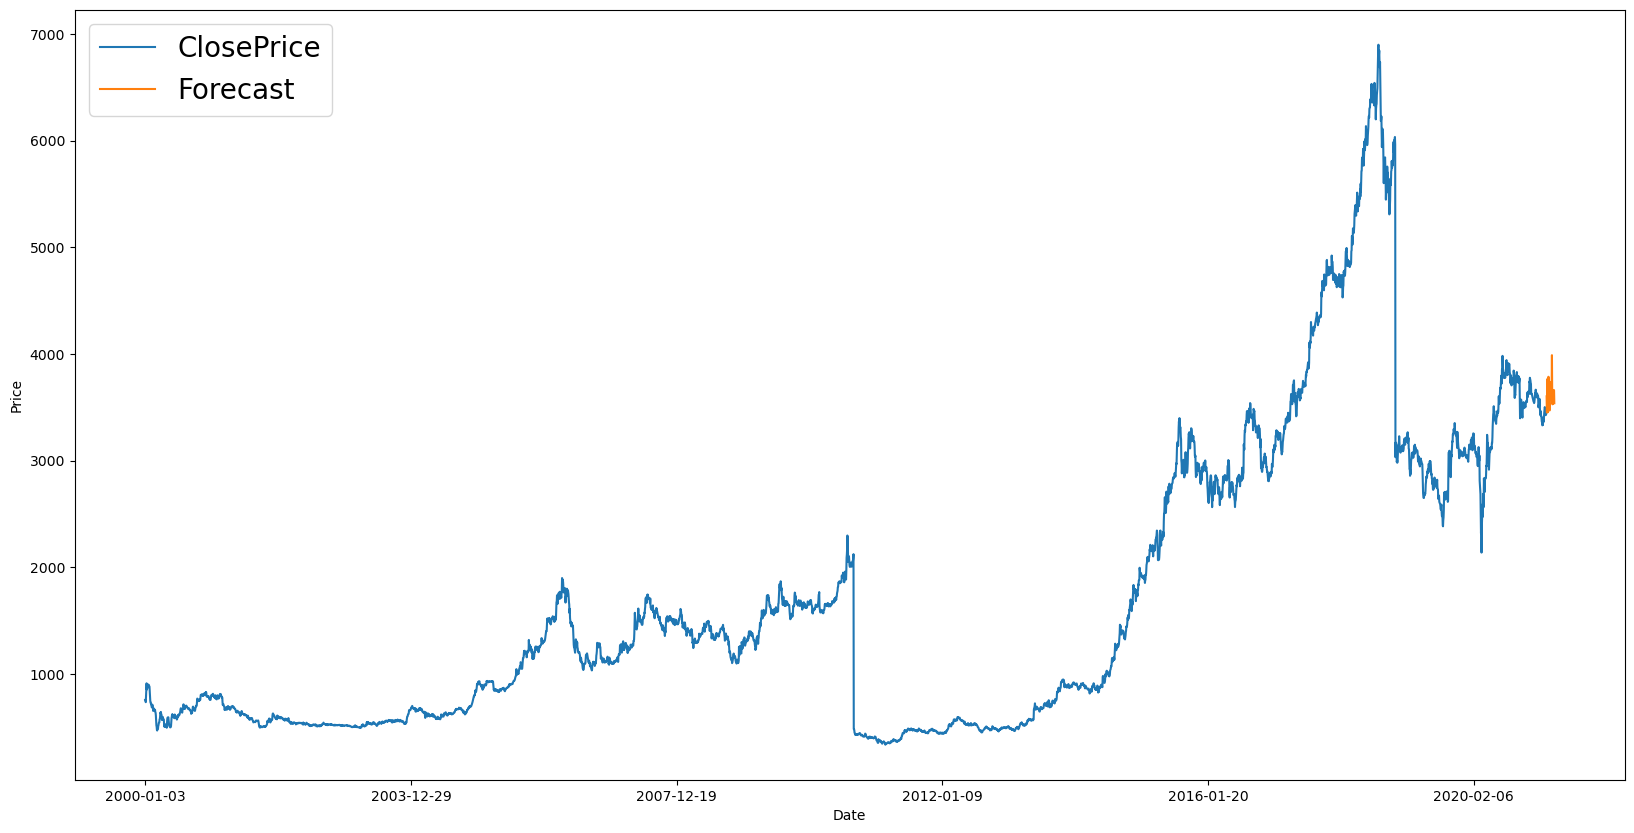

In [102]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')